# Ön Bilgi
**Geliştiren :** Onur Kantar

**Veri Kümesi :** Iris Data Set - (https://archive.ics.uci.edu/ml/datasets/iris)

**Veri Kümesinin İçeriği :** Her biri 50 türden oluşan 3 sınıf içerir, burada her sınıf bir tür iris bitkisini belirtir. Ayrıca her bir örnek için 4 özellik tanımlanmıştır.

**Veri Kümesinin Sınıfları :** 

-	Iris Setosa (50)
-	Iris Versicolor (50)
-	Iris Virginica (50)

**Algoritma :** K Nearest Neighbor (KNN)

**Doğruluk Oranı :** %100

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import preprocessing
from IPython.display import Image

plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
iris = pd.read_csv("/content/drive/My Drive/Colab Notebooks/K-NN-and-MLP-on-IRIS-Data-Set/iris.csv")

# Veri Setimizi Tanıyalım : 

---


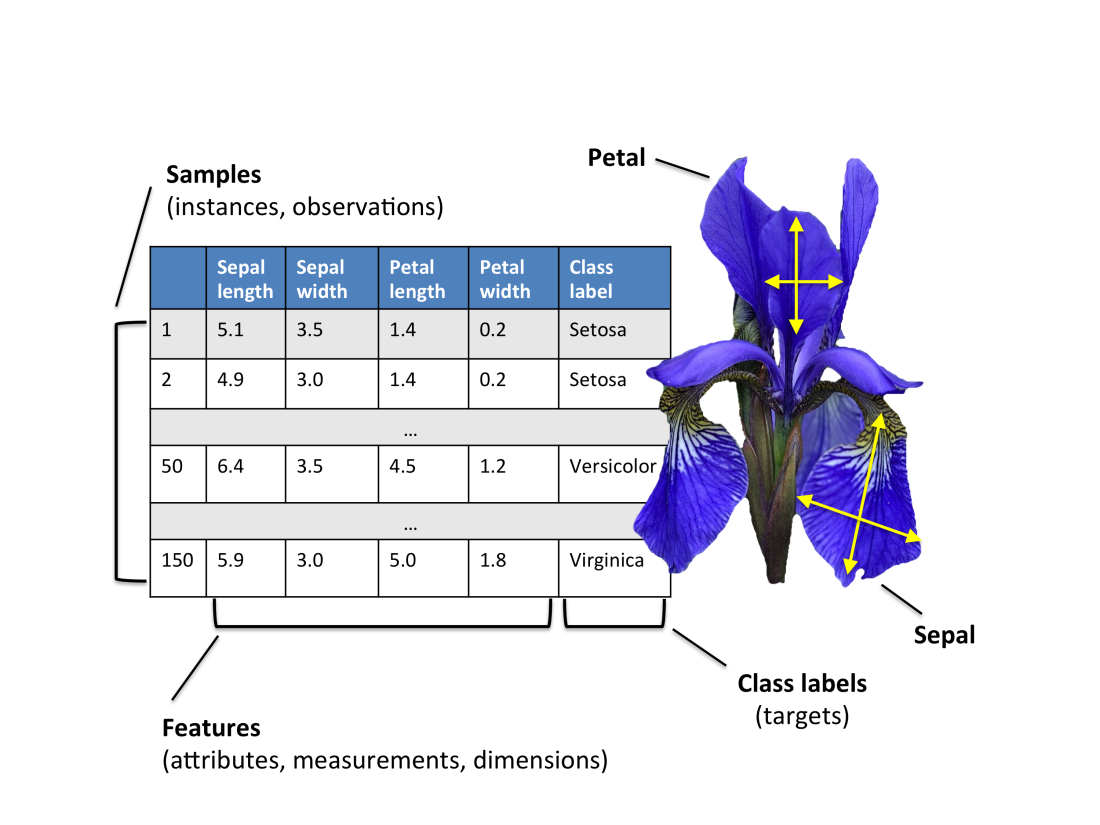

In [3]:
Image(filename="/content/drive/My Drive/Colab Notebooks/K-NN-and-MLP-on-IRIS-Data-Set/img/iris.png", width=700)

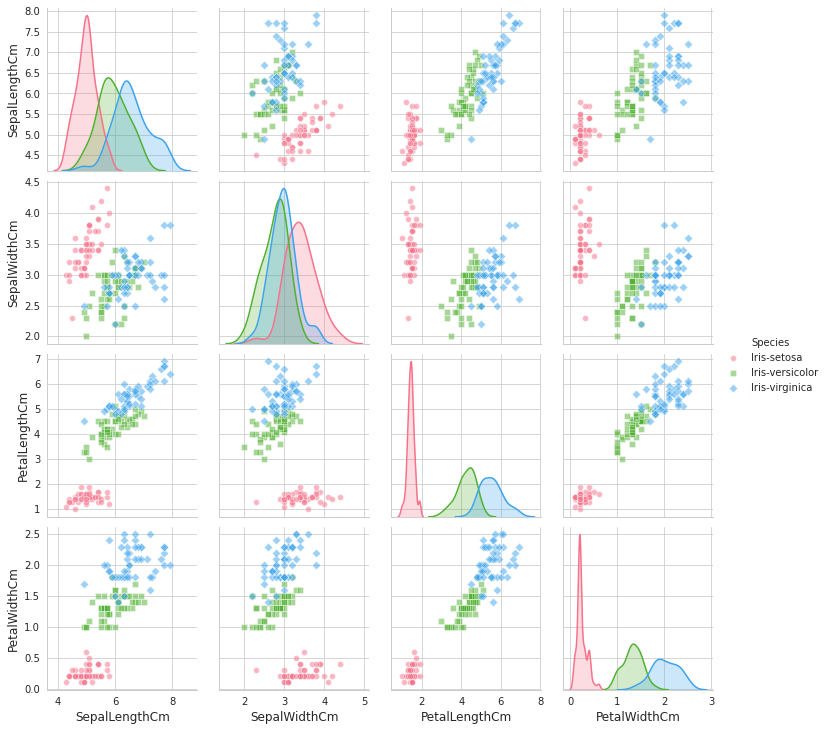

In [4]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="Species", palette="husl", markers=["o", "s", "D"], plot_kws={'alpha':0.5});

# Özellikleri ve Sınıfları Ayıralım : 

---


In [5]:
x = iris.iloc[:, :-1]
y = iris.iloc[:, -1:].values.ravel()
last_x = x

# X Verilerimizi Ölçeklendirelim : 


---


## Verileri Ölçeklendirmek Nedir?
Ölçeklendirme dediğimiz şey veri setindeki iki farklı özelliğin (değişkenin) değerlerini en doğru şekilde analiz edebilmemize olanak sağlayan bir yöntemdir.

- Verilerinizin dağılımının 0 ile 1 arasında olacak şekilde değiştiriyoruz (Normalleştirme).
- Tutarlılık oluşuyor. Bir veri diğer verilerden daha büyükse diğerleri üzerinde egemenlik kurabilir. Bunu istemeyiz.
- Bir öğrenme modeliyle çalışırken, özellikleri sıfır merkezli bir aralığa ölçeklemek önemlidir.

### Örnek :
İki farklı insan düşünelim. Bu insanların birisinin geliri ayda 5.000 Türk Lirası iken diğerinin geliri ayda 200.000 Türk Lirası olsun. Bu insanların ikisi de her ay belirli miktarda maddi yardım için maaşlarının bir kısmını ayırıyorlar. Diyelim ki 5.000 Türk Lirası maaşı olan şahıs 1.500 Türk Lirasını yardıma ayırıyorken, 200.000 Türk Lirası alan şahıs 10.000 Türk Lirasını yardım için ayırıyor.

Normal bir gözle bakarsak 10.000 Türk Lirası yardımda bulunan kişinin daha fazla yardım yaptığını görürüz. Fakat bunu oranladığımızda 5.000 Türk Lirası alan kişinin oransal olarak kat kat fazla yardım yaptığı anlaşılacaktır. İşte özellik ölçeklendirme ile biz bu özelliklerin sayısal değerlerinin birbirine yakın olmasını sağlayıp aralarındaki değerleri karşılaştırmak yerine oranları karşılaştırır.

In [6]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
x = x.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


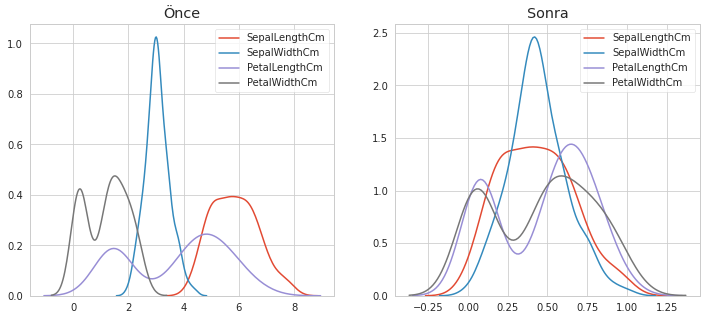

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Önce')
sns.kdeplot(last_x['SepalLengthCm'], ax=ax1)
sns.kdeplot(last_x['SepalWidthCm'], ax=ax1)
sns.kdeplot(last_x['PetalLengthCm'], ax=ax1)
sns.kdeplot(last_x['PetalWidthCm'], ax=ax1)

ax2.set_title('Sonra')
sns.kdeplot(x['SepalLengthCm'], ax=ax2)
sns.kdeplot(x['SepalWidthCm'], ax=ax2)
sns.kdeplot(x['PetalLengthCm'], ax=ax2)
sns.kdeplot(x['PetalWidthCm'], ax=ax2)

plt.show()

# Y Verilerimizi One Hot Encoding Uygulamamız Gerekiyor :  

---



## One Hot Encoding Nedir : 
One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Bu işlem, ağın model için problemi daha kolay hale getirmesine yardımcı olabilir. Uygulanmaması durumunda düşük performansa veya beklenmeyen sonuçlara neden olabilir.


- Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir.
- Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışındaki tüm değerleri   sıfır  olan bir ikili vektör olarak temsil edilir.


In [9]:
pd.DataFrame(y).sample(5)

,0
69,Iris-versicolor
98,Iris-versicolor
55,Iris-versicolor
131,Iris-virginica
133,Iris-virginica


In [10]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
pd.DataFrame(y).sample(5)

,0
52,1
115,2
74,1
109,2
26,0


In [11]:
y = keras.utils.to_categorical(y)
pd.DataFrame(y).sample(5)

,0,1,2
33,1.0,0.0,0.0
111,0.0,0.0,1.0
22,1.0,0.0,0.0
18,1.0,0.0,0.0
86,0.0,1.0,0.0


# Train ve Test İşlemleri İçin Ayrımı Gerçekleştirelim : 

---



In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
print('x Train : ' + str(x_train.shape))
print('x Test : ' + str(x_test.shape))
print('y Train : ' + str(y_train.shape))
print('y Test : ' + str(y_test.shape))

x Train : (120, 4)
x Test : (30, 4)
y Train : (120, 3)
y Test : (30, 3)


# K İçin En Uygun Değeri Bulalım ve Sonucu Yazdıralım :

---


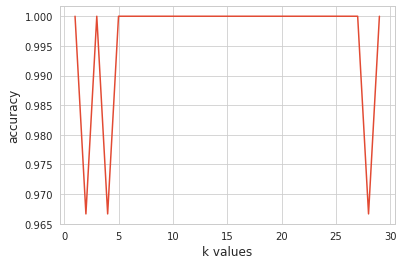

In [14]:
score_list = []
best_k = 1
acc = 0
best_acc = 0
best_knn = 0

for each in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(x_train, y_train)
    acc = knn.score(x_test, y_test)
    score_list.append(acc)
    
    if(acc > best_acc):
        best_acc = acc
        best_k = each
        best_knn = knn
    
    
plt.plot(range(1,30),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [15]:
print("Best k value : " + str(best_k))
print("Best accuracy : " + str(best_acc))

Best k value : 1
Best accuracy : 1.0


# Sonuçları Değerlendirelim : 

---


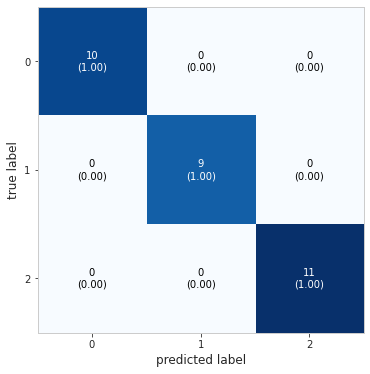

In [16]:
y_pred = best_knn.predict(x_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_class, y_pred_class)


fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                figsize =(6,6))